# 量化交易数据获取与预处理

本notebook将演示如何：
1. 使用alpha_vantage获取股票数据
2. 数据清洗和预处理
3. 数据可视化

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # MacOS
plt.rcParams['axes.unicode_minus'] = False

# 初始化Alpha Vantage API
# 注意：您需要替换为您的API密钥
api_key = 'T99H94DHBIZAZCLI'  # 请从 https://www.alphavantage.co/ 获取免费API密钥
ts = TimeSeries(key=api_key, output_format='pandas')

## 1. 获取股票数据

我们将获取以下股票的数据：
- 苹果公司 (AAPL)
- 微软公司 (MSFT)
- 特斯拉 (TSLA)

In [ ]:
# 定义股票代码列表
tickers = ['AAPL', 'MSFT', 'TSLA']

# 创建数据字典
data = {}

for ticker in tickers:
    print(f'正在获取 {ticker} 的数据...')
    try:
        # 获取数据
        data[ticker], meta_data = ts.get_daily(symbol=ticker, outputsize='full')
        
        # 保存到CSV文件
        data[ticker].to_csv(f'../data/{ticker}_data.csv')
        
        # 添加延时以避免API限制
        time.sleep(12)  # Alpha Vantage免费API限制为每分钟5次请求
        
    except Exception as e:
        print(f'获取 {ticker} 数据时出错: {str(e)}')

print("获取所有数据完成")

正在获取 AAPL 的数据...
正在获取 MSFT 的数据...
正在获取 TSLA 的数据...


## 2. 数据清洗和预处理

In [2]:
# 检查数据
for ticker in tickers:
    if ticker in data:
        print(f'\n{ticker} 数据信息：')
        print(data[ticker].info())
        print('\n前5行数据：')
        print(data[ticker].head())
        print('\n缺失值统计：')
        print(data[ticker].isnull().sum())

NameError: name 'tickers' is not defined

## 3. 数据可视化

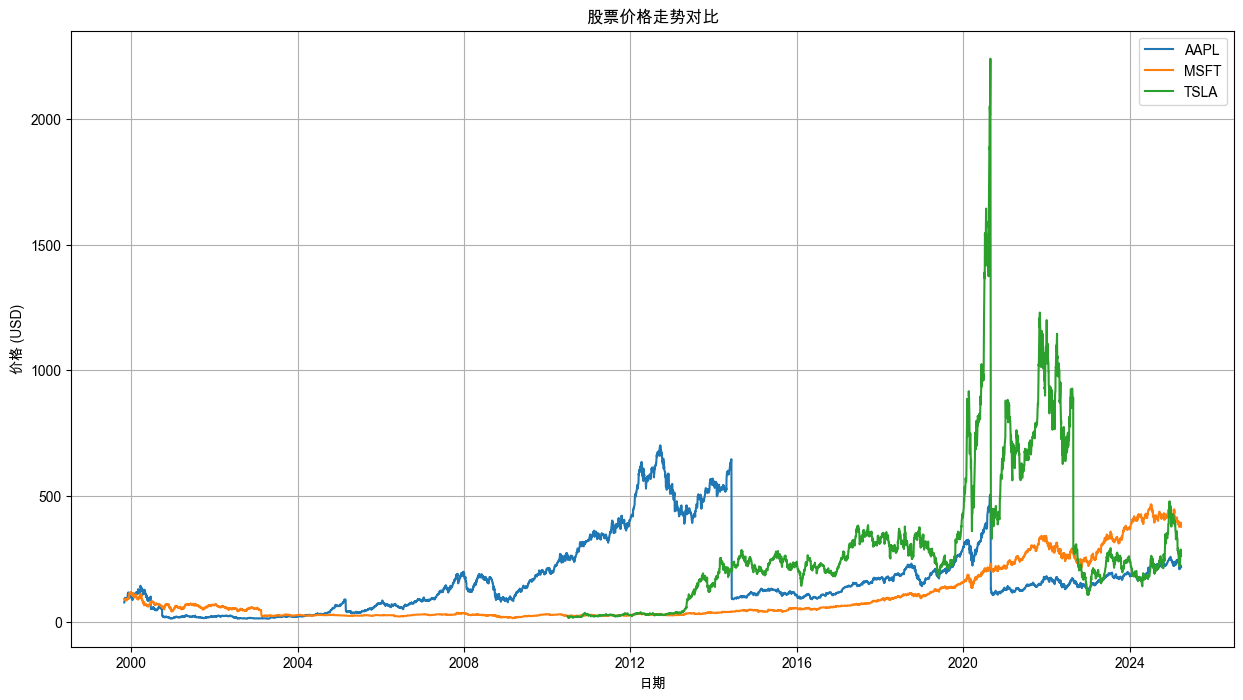

In [4]:
# 创建价格走势图
plt.figure(figsize=(15, 8))

for ticker in tickers:
    if ticker in data:
        plt.plot(data[ticker].index, data[ticker]['4. close'], label=ticker)

plt.title('股票价格走势对比')
plt.xlabel('日期')
plt.ylabel('价格 (USD)')
plt.legend()
plt.grid(True)
plt.show()

## 4. 计算日收益率

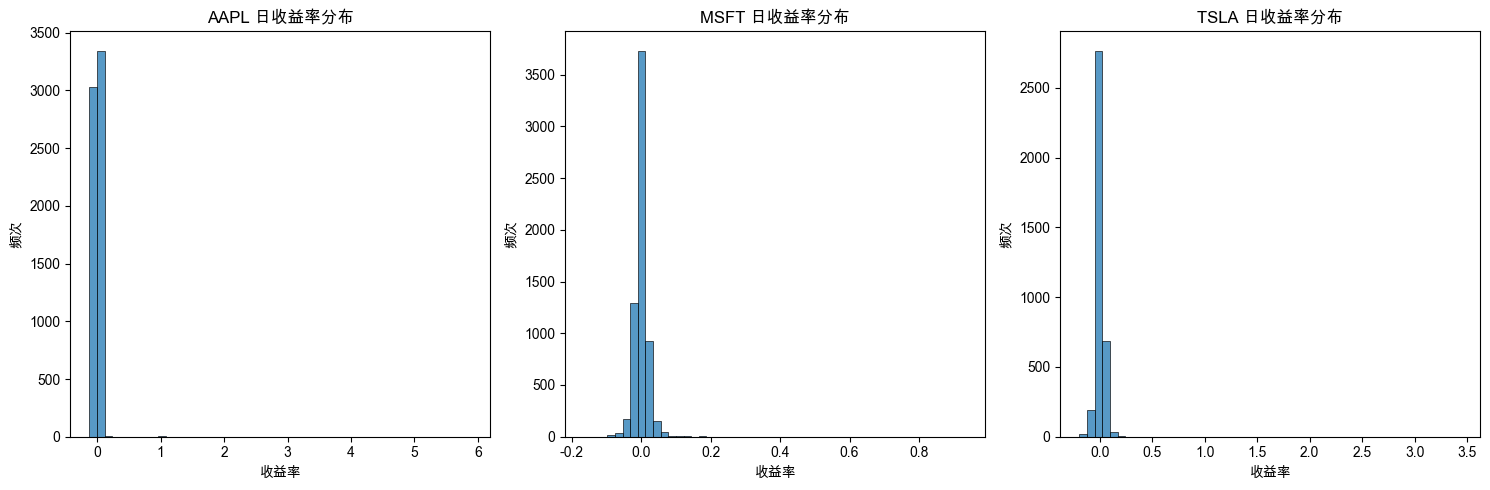

In [5]:
# 计算日收益率
returns = {}

for ticker in tickers:
    if ticker in data:
        returns[ticker] = data[ticker]['4. close'].pct_change()

# 绘制收益率分布图
plt.figure(figsize=(15, 5))

for i, ticker in enumerate(tickers, 1):
    if ticker in returns:
        plt.subplot(1, 3, i)
        sns.histplot(returns[ticker].dropna(), bins=50)
        plt.title(f'{ticker} 日收益率分布')
        plt.xlabel('收益率')
        plt.ylabel('频次')

plt.tight_layout()
plt.show()